<div style="background-color: #f7b529; font-size: 35px; color: white; font-weight: bold; padding-top: 40px; padding-bottom: 40px; padding-left: 20px; padding-right: 20px; width: 100%; border-radius: 5px; text-align: center;">
  Google App Store Project
</div>

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
playstore = "googleplaystore.csv"
reviews = "googleplaystore_user_reviews.csv"

In [172]:
playstore_df = pd.read_csv(playstore)
review_df = pd.read_csv(reviews)

In [173]:
playstore_df.shape

(10841, 13)

In [174]:
review_df.shape

(64295, 5)

<div style="background-color: #179c52; font-size: 35px; color: white; font-weight: bold; padding-top: 40px; padding-bottom: 40px; padding-left: 20px; padding-right: 20px; width: 100%; border-radius: 5px; text-align: center;">
  Exploratory Data Analysis
</div>

In [175]:
# Check for duplicate rows
playstore_df.duplicated().sum()

483

In [176]:
# Remove duplicate rows
playstore_df = playstore_df.drop_duplicates()

In [177]:
playstore_df.shape

(10358, 13)

In [178]:
playstore_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [179]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [180]:
#check descriptive statistics
playstore_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10358,10358,8893.000000,10358,10358,10358,10357,10358,10357,10358,10358,10350,10355
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1943,NaN,593,1526,1488,9591,9592,8382,842,298,1302,2379
mean,NaN,NaN,4.189542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.545452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
#check null values
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [182]:
# Drop null values in all columns
playstore_df = playstore_df.dropna()

In [183]:
# Check updated dataframe
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

<div style="background-color: #179c52; font-size: 20px; color: white; font-weight: bold; padding-top: 20px; padding-bottom: 20px; padding-left: 20px; padding-right: 20px; width: 100%; border-radius: 5px; text-align: center;">
  What are the top 25 most-installed apps?
</div>

In [184]:
# Clean 'Installs' column: remove non-numeric values, remove ',' and '+' then convert to int 
# (e.g. 1,000,000+ is converted to 1000000)

# Drop the row which has 'Free' in Installs column.
playstore_df = playstore_df[playstore_df['Installs'] != 'Free']

# Remove + and , and convert to numeric value
playstore_df['Installs'] = playstore_df['Installs'].astype(str).str.replace('[+,]', '', regex=True)
playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'], errors='coerce')

# Get top 25 installed apps
top_installed_apps = playstore_df[['App', 'Category', 'Installs' ]].drop_duplicates().sort_values(by='Installs', ascending = False).head(25)

# Show result
print(top_installed_apps.reset_index(drop=True))

                                         App             Category    Installs
0                          Google Play Books  BOOKS_AND_REFERENCE  1000000000
1                                   Facebook               SOCIAL  1000000000
2                               Google Drive         PRODUCTIVITY  1000000000
3                                Google News   NEWS_AND_MAGAZINES  1000000000
4                  Maps - Navigate & Explore     TRAVEL_AND_LOCAL  1000000000
5                              Google Photos          PHOTOGRAPHY  1000000000
6                                      Gmail        COMMUNICATION  1000000000
7                                   Hangouts        COMMUNICATION  1000000000
8                                     Google                TOOLS  1000000000
9                             Subway Surfers                 GAME  1000000000
10  Messenger – Text and Video Chat for Free        COMMUNICATION  1000000000
11                                   Google+               SOCIA

<div style="background-color: #179c52; font-size: 20px; color: white; font-weight: bold; padding-top: 20px; padding-bottom: 20px; padding-left: 20px; padding-right: 20px; width: 100%; border-radius: 5px; text-align: center;">
What are the top app categories based on the number of apps and type?
</div>

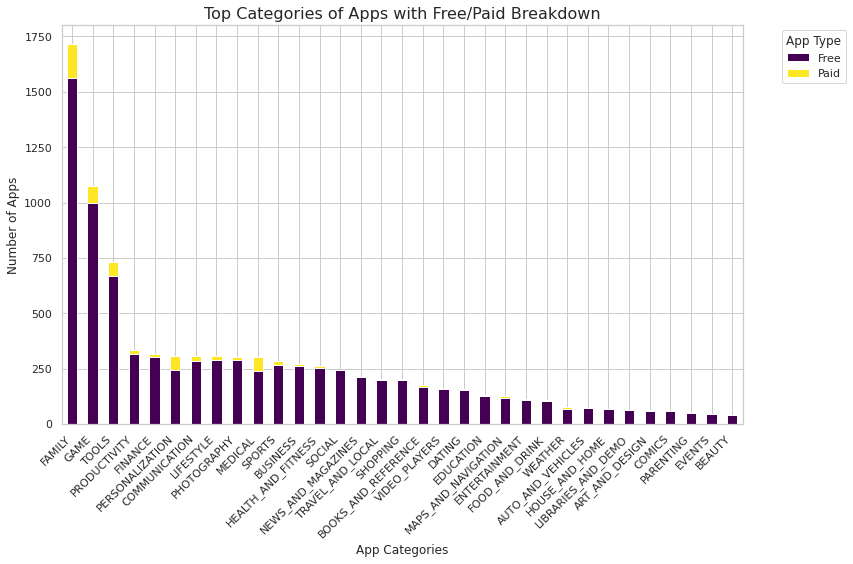

In [185]:
# Ensure 'Rating' column is numeric and handle errors by coercing invalid values
playstore_df['Rating'] = pd.to_numeric(playstore_df['Rating'], errors='coerce')

# Group by 'Category' and 'Type' (Free/Paid), then count the number of apps in each group
category_type_counts = playstore_df.groupby(['Category', 'Type']).size().unstack(fill_value=0)

# Sort by total number of apps per category
category_type_counts = category_type_counts.loc[category_type_counts.sum(axis=1).sort_values(ascending=False).index]

# Plotting the stacked bar chart
ax = category_type_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Customize plot
plt.title('Top Categories of Apps with Free/Paid Breakdown', fontsize=16)
plt.xlabel('App Categories', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='App Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


<div style="background-color: #179c52; font-size: 20px; color: white; font-weight: bold; padding-top: 20px; padding-bottom: 20px; padding-left: 20px; padding-right: 20px; width: 100%; border-radius: 5px; text-align: center;">
  What is the total number of apps for each category and their average rating?
</div>

In [186]:
# List of top applications categories based on the number of apps and average ratings:

# Count of apps per category - top 10
category_counts = playstore_df['Category'].value_counts().head(10)

# Convert 'Rating' to numeric
playstore_df['Rating'] = pd.to_numeric(playstore_df['Rating'], errors='coerce')

# Group by 'Category' and calculate app count and average rating
category_summary = playstore_df.groupby('Category').agg({
    'App': 'count',       
    'Rating': 'mean'      
}).rename(columns={'App': 'Number of Apps', 'Rating': 'Average Rating'})

# Sort by Number of Apps and take the top 10
top_10_categories = category_summary.sort_values('Number of Apps', ascending=False).head(15)

# Round the average rating
top_10_categories['Average Rating'] = top_10_categories['Average Rating'].round(2)

# Display the result
print(top_10_categories)

                    Number of Apps  Average Rating
Category                                          
FAMILY                        1717            4.19
GAME                          1074            4.28
TOOLS                          733            4.05
PRODUCTIVITY                   334            4.20
FINANCE                        317            4.13
PERSONALIZATION                308            4.33
COMMUNICATION                  307            4.15
LIFESTYLE                      305            4.10
PHOTOGRAPHY                    304            4.18
MEDICAL                        302            4.18
SPORTS                         286            4.23
BUSINESS                       270            4.10
HEALTH_AND_FITNESS             262            4.26
SOCIAL                         244            4.25
NEWS_AND_MAGAZINES             214            4.13


<div style="background-color: #179c52; font-size: 20px; color: white; font-weight: bold; padding-top: 20px; padding-bottom: 20px; padding-left: 20px; padding-right: 20px; width: 100%; border-radius: 5px; text-align: center;">
What are the correlation coefficients among price, installs, reviews and ratings?
</div>

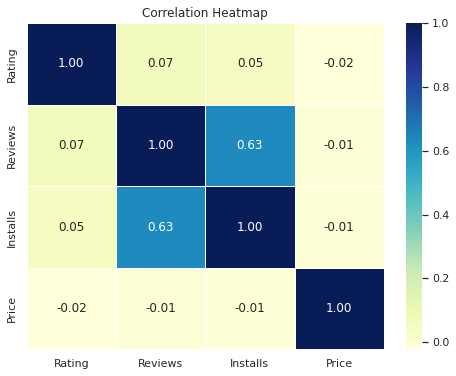

In [187]:
# Select numeric columns for correlation
numeric_df = playstore_df[['Rating', 'Reviews', 'Installs', 'Price']].copy()

# Convert 'Reviews' and 'Price' to numeric
numeric_df['Reviews'] = pd.to_numeric(playstore_df['Reviews'], errors='coerce')
numeric_df['Price'] = playstore_df['Price'].astype(str).str.replace('$', '').astype(float)

# Step 3: Drop missing values
numeric_df.dropna(inplace=True)

# Step 4: Compute correlation matrix
corr_matrix = numeric_df.corr()

# Step 5: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<div style="background-color: #179c52; font-size: 20px; color: white; font-weight: bold; padding-top: 20px; padding-bottom: 20px; padding-left: 20px; padding-right: 20px; width: 100%; border-radius: 5px; text-align: center;">
  What is the distribution of apps across different rating levels?
</div>

In [188]:
# Create bins and labels for the ratings
bins = [0, 2, 3, 4, 4.5, 5]  # Adjusted to include all possible ratings starting from 0

# Create labels for ratings
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Create a new column for rating categories
playstore_df['Rating_Category'] = pd.cut(playstore_df['Rating'], bins=bins, labels=labels, include_lowest=True)

# Count the number of apps in each rating category bin
rating_counts = playstore_df['Rating_Category'].value_counts()

print(rating_counts)

Rating_Category
Very Good    4566
Good         2120
Excellent    1838
Fair          295
Poor           67
Name: count, dtype: int64


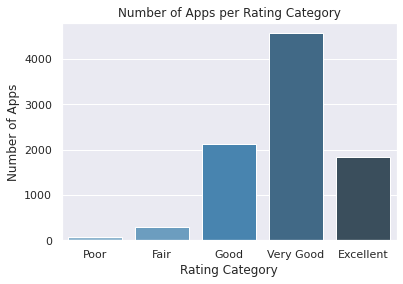

In [189]:
sns.set_theme()

# Convert to DataFrame
rating_counts_df = rating_counts.reset_index()

# Rename columns
rating_counts_df.columns = ['Rating Category', 'Number of Apps']

# Create a barplot
sns.barplot(x='Rating Category', y='Number of Apps', data=rating_counts_df, hue = 'Rating Category' , palette='Blues_d', legend = False)

plt.title('Number of Apps per Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Number of Apps')
plt.show()


<div style="background-color: #179c52; font-size: 20px; color: white; font-weight: bold; padding-top: 20px; padding-bottom: 20px; padding-left: 20px; padding-right: 20px; width: 100%; border-radius: 5px; text-align: center;">
  How do app ratings relate to the number of installs across different app types (Free vs Paid)?
</div>

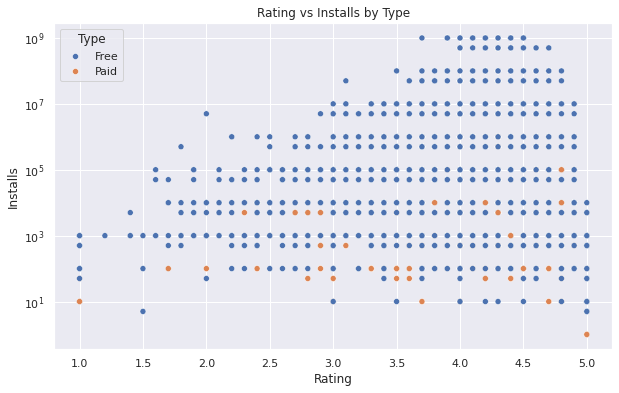

In [190]:
sns.set_theme()

plt.figure(figsize=(10,6))

g = sns.scatterplot(
    data=playstore_df,
    x="Rating",
    y="Installs",
    hue="Type"
)

plt.yscale('log') 
plt.xlabel("Rating")
plt.ylabel("Installs")
plt.title("Rating vs Installs by Type")


plt.show()

<div style="background-color: #179c52; font-size: 20px; color: white; font-weight: bold; padding-top: 20px; padding-bottom: 20px; padding-left: 20px; padding-right: 20px; width: 100%; border-radius: 5px; text-align: center;">
Exploratory Data Analysis for Review DataFrame
</div>

In [191]:
review_df.shape

(64295, 5)

In [192]:
review_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [193]:
review_df = review_df.dropna()

In [194]:
review_df.shape

(37427, 5)

In [195]:
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [196]:
# Check for duplicate rows
review_df.duplicated().sum()

7735

In [197]:
# Remove duplicate rows
review_df = review_df.drop_duplicates()

In [198]:
review_df.shape

(29692, 5)

In [199]:
review_df.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

<div style="background-color: #179c52; font-size: 20px; color: white; font-weight: bold; padding-top: 20px; padding-bottom: 20px; padding-left: 20px; padding-right: 20px; width: 100%; border-radius: 5px; text-align: center;">
What is the relationship between sentiment polarity and subjectivity in user reviews?
</div>

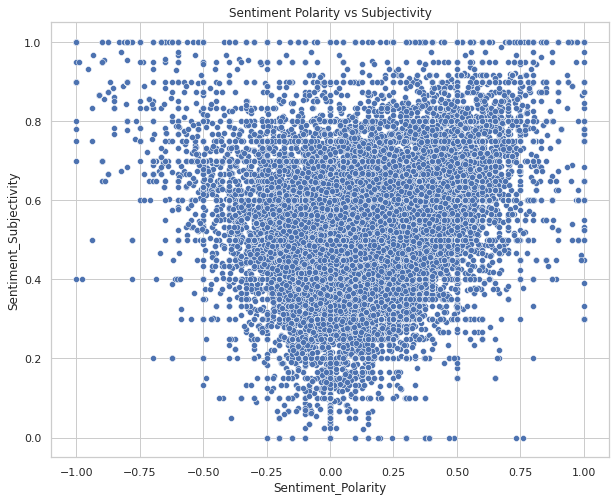

In [213]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = review_df, x = "Sentiment_Polarity", y = "Sentiment_Subjectivity")
plt.title("Sentiment Polarity vs Subjectivity")
plt.show()

# Most reviews fall between neutral to slightly positive polarity.
# Indicates that users tend to leave neutral to positive reviews more than negative ones.

<div style="background-color: #179c52; font-size: 20px; color: white; font-weight: bold; padding-top: 20px; padding-bottom: 20px; padding-left: 20px; padding-right: 20px; width: 100%; border-radius: 5px; text-align: center;">
What is the distribution of review counts by sentiment (Positive, Negative or Neutral)?
</div>

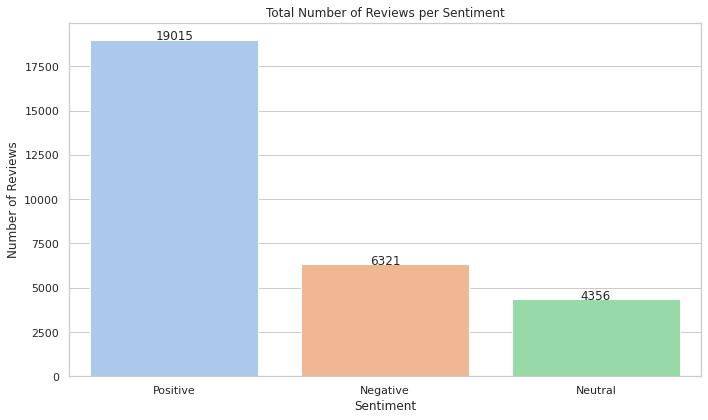

In [218]:
# Count number of reviews for each sentiment
sentiment_counts = review_df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Review Count']

# Set figure size (make it bigger)
plt.figure(figsize=(10, 6))

# Plot
sns.barplot(data=sentiment_counts, x='Sentiment', y='Review Count', hue='Sentiment', palette='pastel', legend=False)

# Add data labels
for index, row in sentiment_counts.iterrows():
    plt.text(index, row['Review Count'] + 5, str(row['Review Count']), ha='center')

plt.title('Total Number of Reviews per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


<div style="background-color: #179c52; font-size: 20px; color: white; font-weight: bold; padding-top: 20px; padding-bottom: 20px; padding-left: 20px; padding-right: 20px; width: 100%; border-radius: 5px; text-align: center;">
What are the most common words in positive and negative reviews?
</div>

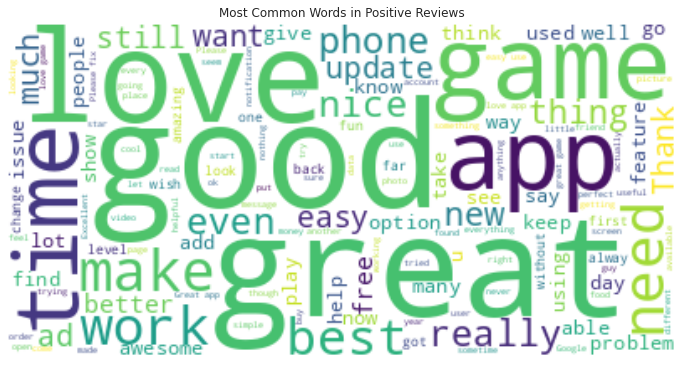

In [222]:
from wordcloud import WordCloud

# For positive reviews
positive_text = ' '.join(review_df[review_df['Sentiment']=='Positive']['Translated_Review'].dropna())
wordcloud = WordCloud(background_color='white').generate(positive_text)

plt.figure(figsize=(12, 8))  # Set bigger figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Reviews')
plt.show()

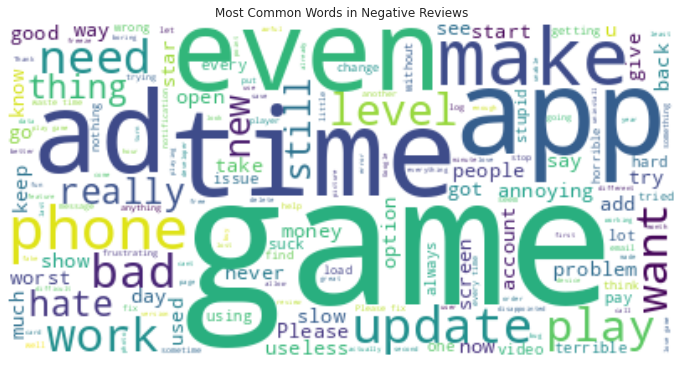

In [223]:
# For negative reviews

negative_text = ' '.join(review_df[review_df['Sentiment']=='Negative']['Translated_Review'].dropna())
wordcloud = WordCloud(background_color='white').generate(negative_text)

plt.figure(figsize=(12, 8))  # Set bigger figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Reviews')
plt.show()

<div style="background-color: #f7b529; font-size: 35px; color: white; font-weight: bold; padding-top: 40px; padding-bottom: 40px; padding-left: 20px; padding-right: 20px; width: 100%; border-radius: 5px; text-align: center;">
  Merge Tables
</div>

In [202]:
# Create a merged dataframe using 'App' column:
merged_df = pd.merge(playstore_df, review_df, on='App', how='inner')

In [203]:
# Inspect new dataframe
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Good,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Good,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Good,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Good,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Good,I hate,Negative,-0.800,0.900000


In [204]:
merged_df.shape

(40376, 18)

<div style="background-color: #f7b529; font-size: 20px; color: white; font-weight: bold; padding-top: 20px; padding-bottom: 20px; padding-left: 20px; padding-right: 20px; width: 100%; border-radius: 5px; text-align: center;">
How do sentiment polarity and subjectivity scores vary across different app rating categories? 
</div>

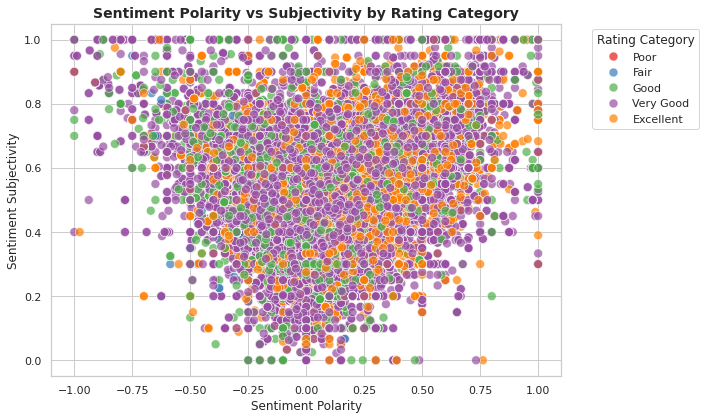

In [205]:
# Create a scatterplot to show the distribution of Sentiment Subjectivity and Sentiment Polarity by Rating Category
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.scatterplot(
    data=merged_df,
    x="Sentiment_Polarity",
    y="Sentiment_Subjectivity",
    hue="Rating_Category",
    alpha=0.7,
    s=80,
    palette='Set1'  # distinct colors
)

# Titles and labels
plt.title("Sentiment Polarity vs Subjectivity by Rating Category", fontsize=14, fontweight='bold')
plt.xlabel("Sentiment Polarity", fontsize=12)
plt.ylabel("Sentiment Subjectivity", fontsize=12)
plt.legend(title="Rating Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# This scatterplot shows that while there’s a general trend (negative reviews → negative polarity, 
# positive reviews → positive polarity), all rating categories overlap heavily in sentiment space, 
# and most reviews are expressed subjectively rather than factually.

<div style="background-color: #f7b529; font-size: 20px; color: white; font-weight: bold; padding-top: 20px; padding-bottom: 20px; padding-left: 20px; padding-right: 20px; width: 100%; border-radius: 5px; text-align: center;">
How do sentiment polarity and subjectivity relate to average ratings within different rating groups?
</div>

In [228]:
# Group the dataframe by 'Rating_Category' and aggregate multiple statistics
content_summary = analysis_df.groupby('Rating_Category').agg(
    # Calculate the average of the 'Rating' column within each group
    Avg_Rating=('Rating', 'mean'),
    
    # Calculate the average sentiment polarity within each rating category
    Avg_Sentiment=('Sentiment_Polarity', 'mean'),
    
    # Calculate the average subjectivity score within each rating category
    Avg_Subjectivity=('Sentiment_Subjectivity', 'mean'),
    
    # Count the total number of reviews in each rating category
    Count=('Rating', 'count')
)

# Sort the resulting summary dataframe by 'Avg_Rating' in descending order
content_summary = content_summary.sort_values(by='Avg_Rating', ascending=False)

# Print the summary table to view average ratings, sentiment stats, and counts by rating category
print(content_summary)

                 Avg_Rating  Avg_Sentiment  Avg_Subjectivity  Count
Rating_Category                                                    
Excellent          4.641896       0.196473          0.517117   8669
Very Good          4.332414       0.168652          0.493016  26115
Good               3.820110       0.125984          0.472925   5460
Fair               2.819697      -0.057543          0.379686    132
Poor                    NaN            NaN               NaN      0


<div style="background-color: #f7b529; font-size: 20px; color: white; font-weight: bold; padding-top: 20px; padding-bottom: 20px; padding-left: 20px; padding-right: 20px; width: 100%; border-radius: 5px; text-align: center;">
How consistent or varied are sentiment polarity and subjectivity within each rating category
</div>

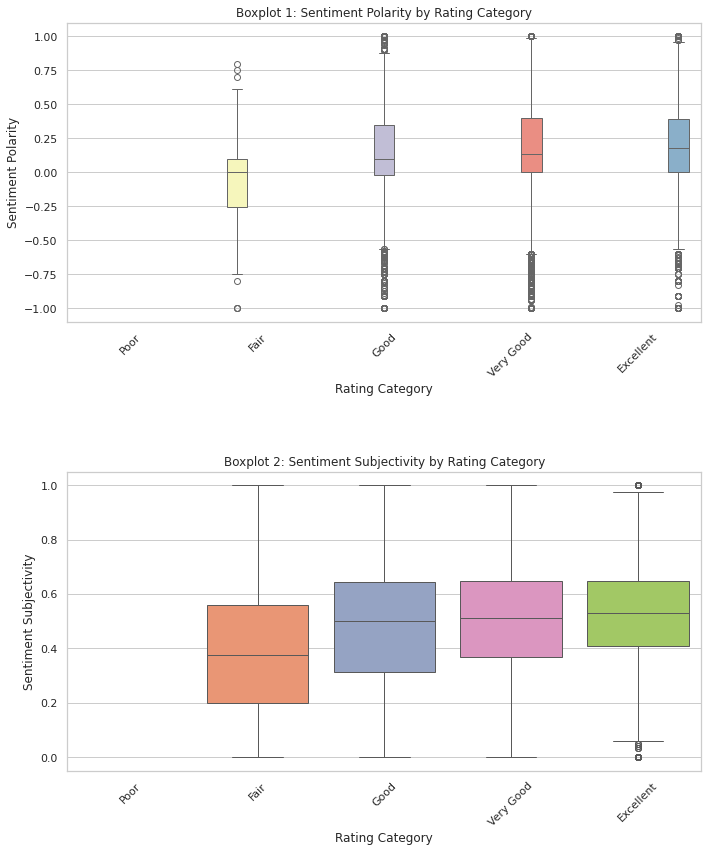

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2-row, 1-column grid of subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # Adjusted height for 2 plots

# Boxplot 1: Sentiment Polarity
sns.boxplot(
    data=analysis_df,
    x='Rating_Category',
    y='Sentiment_Polarity',
    hue='Rating_Category',
    palette='Set3',
    ax=axes[0]
)
axes[0].set_title('Boxplot 1: Sentiment Polarity by Rating Category')
axes[0].set_ylabel('Sentiment Polarity')
axes[0].set_xlabel('Rating Category')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend([], [], frameon=False)

# Boxplot 2: Sentiment Subjectivity
sns.boxplot(
    data=analysis_df,
    x='Rating_Category',
    y='Sentiment_Subjectivity',
    hue='Rating_Category',
    palette='Set2',
    dodge=False,
    ax=axes[1]
)
axes[1].set_title('Boxplot 2: Sentiment Subjectivity by Rating Category')
axes[1].set_ylabel('Sentiment Subjectivity')
axes[1].set_xlabel('Rating Category')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend([], [], frameon=False)

# Final layout adjustments
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Add vertical space between plots
plt.show()


# As ratings increase from Poor → Excellent, sentiment polarity shifts from negative → positive.
# Higher ratings (Good to Excellent) are expressed in more subjective, opinionated language, while Fair ratings are more neutral/objective.
# Some reviews with “Excellent” ratings still have negative polarity, and some “Poor” ratings contain positive polarity — 
# indicating inconsistencies in how users rate vs. how they write.

<div style="background-color: #f7b529; font-size: 20px; color: white; font-weight: bold; padding-top: 20px; padding-bottom: 20px; padding-left: 20px; padding-right: 20px; width: 100%; border-radius: 5px; text-align: center;">
  Which variables have strong positive or negative correlations in the dataset?
</div>

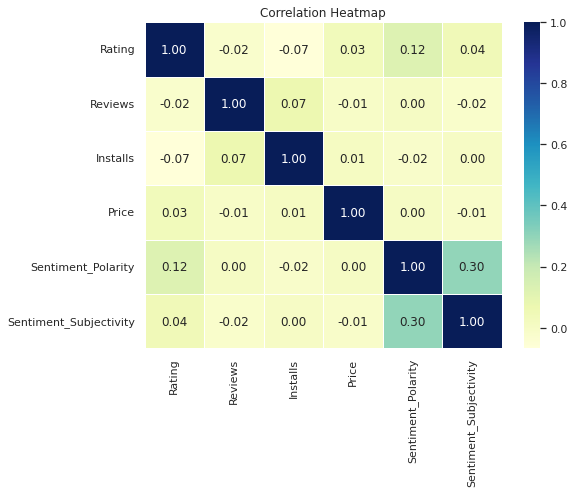

In [235]:
# Select numeric columns for correlation
numeric_df = merged_df[['Rating', 'Reviews', 'Installs', 'Price', 'Sentiment_Polarity', 'Sentiment_Subjectivity']].copy()

# Convert 'Reviews' and 'Price' to numeric
numeric_df['Reviews'] = pd.to_numeric(playstore_df['Reviews'], errors='coerce')
numeric_df['Price'] = playstore_df['Price'].astype(str).str.replace('$', '').astype(float)

# Step 3: Drop missing values
numeric_df.dropna(inplace=True)

# Step 4: Compute correlation matrix
corr_matrix = numeric_df.corr()

# Step 5: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()